In [11]:
import jieba
import jieba.analyse
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

### 分詞

In [13]:
jieba.set_dictionary('dict.txt-v2.big')    

string2=['']
#with open("hw1-dataset.txt", "r",encoding = 'utf-8') as f:
with open("hw1-dataset.txt", "r",encoding = 'utf-8') as f:
    data = f.read().splitlines()
    string2=data
stri = "".join(string2)
string1 = jieba.lcut(stri,cut_all=False)

Building prefix dict from D:\cgu\課程\四年級\四上\自然語言處理\HW1\dict.txt-v2.big ...
DEBUG:jieba:Building prefix dict from D:\cgu\課程\四年級\四上\自然語言處理\HW1\dict.txt-v2.big ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.u43bb23e86e4b3834da3c7bce3abff3c8.cache
DEBUG:jieba:Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.u43bb23e86e4b3834da3c7bce3abff3c8.cache
Loading model cost 2.991 seconds.
DEBUG:jieba:Loading model cost 2.991 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


### 移除停留詞

In [14]:
new_list = []
def remove_stop_words(file_name,string1):
    with open(file_name,'r',encoding="utf-8") as f:
        stop_words = f.readlines()
    stop_words = [stop_word.rstrip() for stop_word in stop_words]
  
    for seg in string1:
        if seg not in stop_words:
            if seg == '\n':
                continue
            elif seg == '\t':
                continue
            elif seg == ' ':
                continue
            elif len(seg) == 1:
                continue
            else:
                new_list.append(seg) #若在for loop裡用remove的話則會改變總長度
    return new_list

file_name = './停留詞.txt'
string1 = remove_stop_words(file_name,string1)
#print('remove_stop_words: ',string1)

### 詞頻統計

In [15]:
new={}
wordArr = []
countArr =[]
allWordNum=0
for word in string1:
    # 對原來的字典new中判斷是否有rword這個人，沒有就返回0，
    # 賦予rword鍵有就在原來rword所對應的值加1，並賦予rword鍵
    new[word]=new.get(word,0)+1
    allWordNum+=1

for word in new :
    new[word]=new[word]/allWordNum
    
#print(new)
item=list(new.items())
#print(new.items())
#print(allWordNum)
item.sort(key=lambda x:x[1],reverse=True)
for i in range(100):
    word,count=item[i]
    wordArr.append(word)
    countArr.append(count)

### 頻率長條圖 

1 : 八卦
2 : 有沒有
3 : 什麼
4 : 台灣
5 : 可以
6 : 是不是
7 : 為什麼
8 : 怎麼
9 : 肥宅
10 : 現在
11 : 真的
12 : 比較
13 : 不會
14 : 知道
15 : 自己
16 : 怎麼辦
17 : 沒有
18 : 不是
19 : 還是
20 : 一個
21 : 就是
22 : 如果
23 : 一堆
24 : 這樣
25 : 一樣
26 : 覺得
27 : 怎樣
28 : 到底
29 : 日本
30 : 喜歡
31 : 不要
32 : 時候
33 : 大家
34 : 美國
35 : 有人
36 : 很多
37 : 為何
38 : 台灣人
39 : 應該
40 : 問題
41 : 感覺
42 : 哪個
43 : 幹嘛
44 : 看到
45 : 朋友
46 : 這麼
47 : 因為
48 : 如何
49 : 還有
50 : 一直
51 : 這種
52 : 中國
53 : 東西
54 : 女生
55 : 其實
56 : 不能
57 : 別人
58 : 出來
59 : 然後
60 : 開始
61 : 不用
62 : 根本
63 : 一定
64 : 正妹
65 : 國家
66 : 多少
67 : 國人
68 : 那麼
69 : 的話
70 : 只有
71 : 鄉民
72 : 可能
73 : 以前
74 : 這個
75 : 哪裡
76 : 已經
77 : 甚麼
78 : QQ
79 : 妹妹
80 : 一下
81 : 今天
82 : 那個
83 : 大學
84 : 請問
85 : 時間
86 : 所以
87 : 直接
88 : 邊緣
89 : 老師
90 : 只是
91 : 變成
92 : 發現
93 : 最後
94 : 好吃
95 : 韓國
96 : 他們
97 : 世界
98 : 男生
99 : 不到
100 : 老婆


<BarContainer object of 100 artists>

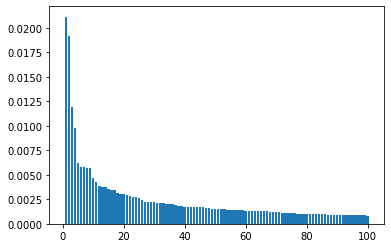

In [16]:
num = []
index=1

for i in range(100):
    num.append(index)
    print(index,":",wordArr[i])
    index+=1
plt.bar(num, countArr)

### TF-IDF權重

In [19]:
#參考https://keng-wei-lin.gitbook.io/awei_wd/text-minig/text-mining-lab
from sklearn.feature_extraction.text import TfidfVectorizer
import re
totalContent = [] 
table = {}
with open('hw1-dataset.txt',encoding="utf-8") as f:
    for line in f.readlines():
        article = ''
        words = jieba.lcut(line, cut_all=False)
        for word in words:
            if word ==( "\n" or "\t" or " "):
                continue
            m = re.match(r'^[\u4E00-\u9FFFa-zA-Z]+$',word )
            if m is not None:
                article += word
                article += ' '
        totalContent.append(article)
## 權重值
textWeightList = []
if __name__ == "__main__":  
    ##計算全部文章
    tfIdfVectorizer = TfidfVectorizer()    
    tfIdf = tfIdfVectorizer.fit_transform(totalContent)  
    myWord=tfIdfVectorizer.get_feature_names()        
    weight=tfIdf.toarray()        
    for i in range(len(weight)):
        textMining = {}       
        for j in range(len(myWord)):             
            textMining[myWord[j]] = weight[i][j]
        textWeightList.append(textMining)
for oneArticle in textWeightList:
    dict1= sorted(oneArticle.items(), key=lambda d:d[1], reverse = True)
    for i in range(0,10):
        table.setdefault(dict1[i][0], dict1[i][1])
new = sorted(table.items(), key=lambda e:e[1], reverse=True)

weight =[]
word = []
for i in range(0, 100):
    word.append(new[i][0])
    weight.append(new[i][1])
    

### TF-IDF長條圖 

1 : 背叛
2 : 嘿嘿
3 : 孑子孓
4 : 金正恩
5 : 面議
6 : 討喜
7 : 廠廠
8 : 蝴蝶
9 : 歐歐
10 : 霍霍
11 : 還迎
12 : 之於
13 : 雷電
14 : la
15 : 張老師
16 : 核核
17 : 三門
18 : 寒冰甲
19 : 黎明
20 : 盲腸
21 : push
22 : 親友團
23 : 催眠術
24 : 手尾
25 : 甲組
26 : 讓開
27 : 運動選手
28 : 罪名
29 : 顏楷
30 : 蓮舫
31 : 咕咕
32 : 開罐器
33 : 打火機
34 : 搖落
35 : 禮拜三
36 : 情緒化
37 : kd
38 : 提琴
39 : 出入口
40 : 脫節
41 : 松屋
42 : 海港
43 : 進出
44 : 貓貓
45 : 一棟
46 : 皇民化
47 : 嗆夠
48 : 金剛
49 : 盒盒
50 : 清純
51 : 民族
52 : 兩槍
53 : 龍骨
54 : 阿思
55 : 黃玉郎
56 : 奮起
57 : 害臊
58 : 磁片
59 : 英吉
60 : 馬肉
61 : 短髮
62 : 可麗露
63 : pavone
64 : 脫光
65 : 八加
66 : 咪路
67 : 憂傷
68 : 阿災
69 : 雙親
70 : 仇台
71 : 當人
72 : 排球
73 : 公然侮辱
74 : 九州
75 : 過戶
76 : 機車行
77 : 看給
78 : 桌椅
79 : 滅國
80 : 進口車
81 : 求職
82 : 炸蝦
83 : 金牌
84 : 聯徵
85 : 烏骨雞
86 : 改名字
87 : easy
88 : 米粉
89 : 版吵
90 : 芬蘭
91 : 龍門客棧
92 : special
93 : 林依晨
94 : 雙層
95 : 紐約
96 : 沒人記
97 : 第二代
98 : 人造
99 : 捕手
100 : 夠用


<BarContainer object of 100 artists>

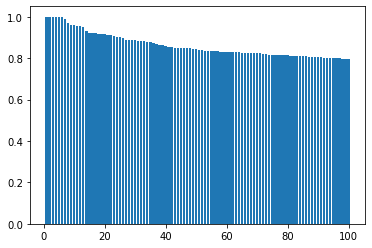

In [23]:
num = []
index=1
for i in range(100):
    num.append(index)
    print(index,":",word[i])
    index+=1
    
#plt.figure(figsize=(50,5))
plt.bar(num, weight)